In [460]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, Table
import re
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from matplotlib import pyplot

In [461]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [462]:
# Create our session (link) from Python to the DB
session = Session(engine)
metadata = MetaData()

Measurement_table = Table('Measurement', metadata,autoload=True, autoload_with=engine)
Station_table = Table('Station', metadata,autoload=True, autoload_with=engine)
print(Measurement_table.columns.keys())
print(Station_table.columns.keys())

['id', 'station', 'date', 'prcp', 'tobs']
['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


## D1: Determine the Summary Statistics for June

In [503]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
regex = r'\d{4}-06-\d{2}'
results = session.query(Measurement.tobs).filter(Measurement.date.op('regexp')(regex)).all()

In [504]:
#  3. Convert the June temperatures to a list.
temps = list(np.ravel(results))

In [505]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(temps, columns = ['June Temps'])

In [506]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


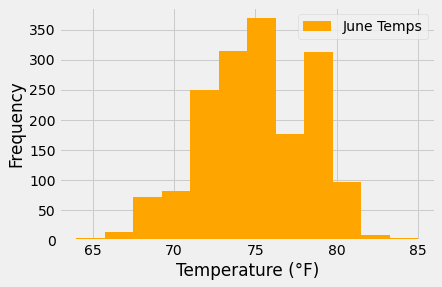

In [507]:
df.plot.hist(bins=12, color = 'orange')
plt.xlabel('Temperature (°F)')
plt.savefig('june_temps_histogram.png')

## D2: Determine the Summary Statistics for December

In [540]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
regex = r'\d{4}-12-\d{2}'
results = session.query(Measurement.tobs).filter(Measurement.date.op('regexp')(regex)).all()

In [541]:
# 7. Convert the December temperatures to a list.
temps = list(np.ravel(results))

In [542]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(temps, columns= ['December Temps'])

In [543]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


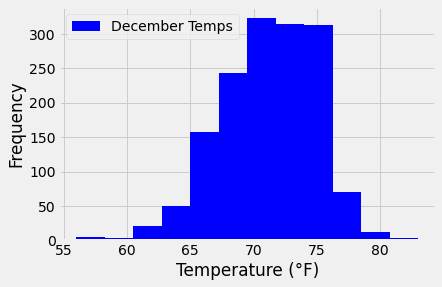

In [525]:
df.plot.hist(bins=12, color = 'b')
plt.xlabel('Temperature (°F)')
plt.savefig('december_temps_histogram.png')

### D3: Additional Queries

In [373]:
# June regex & December regex
form_one = r'\d{4}-06-\d{2}'
form_two = r'\d{4}-12-\d{2}'

june_precip = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date.op('regexp')(form_one)).all()
dec_precip = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date.op('regexp')(form_two)).all()

In [501]:
june_precip_df = pd.DataFrame(june_precip, columns = ['Date','June Precipitation'])
june_precip_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [502]:
dec_precip_df = pd.DataFrame(dec_precip, columns = ['Date','December Precipitation'])
dec_precip_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
